In [10]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'eae7011f-6bbf-449b-b49e-15aa90cad464',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-06-08T08:28:05.363Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10041}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [39]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:


df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906157e+07,1.906157e+07,NaN,1,NaN,NaN,2022-06-08T08:27:00.000Z,30533.155820,4.064876e+10,13.4193,0.514542,3.107996,-3.232833,-8.548745,-28.075067,-21.696971,5.820098e+11,46.6646,6.411963e+11,2022-06-08T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210931e+08,1.210931e+08,NaN,2,NaN,NaN,2022-06-08T08:26:00.000Z,1805.199438,2.237646e+10,11.6602,0.483599,2.273573,-6.627644,-25.918324,-43.699056,-30.115209,2.185972e+11,17.5268,2.185972e+11,2022-06-08T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
2,825,Tether,USDT,tether,34429,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.242055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-08T08:26:00.000Z,0.999432,6.665808e+10,14.2479,-0.001046,0.004079,0.004074,-0.045760,-0.083089,-0.094749,7.237944e+10,5.8076,7.966837e+10,2022-06-08T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 08:28:08.427011
3,3408,USD Coin,USDC,usd-coin,4318,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.384061e+10,5.384061e+10,NaN,4,NaN,NaN,2022-06-08T08:26:00.000Z,1.000170,5.541444e+09,10.6271,-0.026115,-0.004648,0.007217,0.032127,0.050262,0.008433,5.384976e+10,4.3208,5.384976e+10,2022-06-08T08:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 08:28:08.427011
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-08T08:26:00.000Z,291.121411,1.532557e+09,-10.9153,0.900130,2.487275,-8.595857,-14.612967,-31.409533,-22.543171,4.753342e+10,3.8091,4.806902e+10,2022-06-08T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
5,2010,Cardano,ADA,cardano,454,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,6,NaN,NaN,2022-06-08T08:26:00.000Z,0.634784,1.702010e+09,39.2771,0.241578,7.862391,4.483833,-7.578553,-38.877063,-21.065280,2.141700e+10,1.7185,2.856529e+10,2022-06-08T08:26:00.000Z,1839.0,BNB,BNB,bnb,0x3ee2200efb3400fabb9aacf31297cbdd1d435d47,2022-06-08 08:28:08.427011
6,52,XRP,XRP,xrp,736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,2022-06-08T08:27:00.000Z,0.399484,1.563790e+09,12.6722,0.261884,2.107354,-3.695765,-27.001395,-47.503119,-45.417224,1.931229e+10,1.5496,3.994838e+10,2022-06-08T08:27:00.000Z,1839.0,BNB,BNB,bnb,0x1d2f0da169ceb9fc7b3144628db156f3f6c60dbe,2022-06-08 08:28:08.427011
7,4687,Binance USD,BUSD,binance-usd,3814,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.801362e+10,1.801362e+10,NaN,8,NaN,NaN,2022-06-08T08:26:00.000Z,1.001417,6.673342e+09,25.8208,0.127624,-0.001305,-0.050329,0.034122,0.072800,0.094985,1.803915e+10,1.4463,1.803915e+10,2022-06-08T08:26:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-08 08:28:08.427011
8,5426,Solana,SOL,solana,327,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.404489e+08,5.116169e+08,NaN,9,NaN,NaN,2022-06-08T08:26:00

In [24]:

def api_auto():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'eae7011f-6bbf-449b-b49e-15aa90cad464',
    }
    
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#Note:
    #I utilized " jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    #by putting it into Anaconda Prompt to allow me to pull data
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\MR\Desktop\Basil\crypto_api.csv'):
        df.to_csv(r'C:\Users\MR\Desktop\Basil\crypto_api.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\MR\Desktop\Basil\crypto_api.csv', mode = 'a', header = False)
        
        

In [25]:
import os
from time import time
from time import sleep


for i in range(333):
    api_auto()
    print('API Auto completed successfully')
    sleep(60) #sleep for 1 minute and then run the api again
exit()

API Auto completed successfully
API Auto completed successfully


KeyboardInterrupt: 

In [28]:
df_test = pd.read_csv(r'C:\Users\MR\Desktop\Basil\crypto_api.csv')
df_test

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19061568.00000,19061568.00000,NaN,1,NaN,NaN,2022-06-08T08:27:00.000Z,30533.15582,40648760701.81813,13.41930,0.51454,3.10800,-3.23283,-8.54874,-28.07507,-21.69697,582009825910.90552,46.66460,641196272212.70996,2022-06-08T08:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
1,1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121093086.31150,121093086.31150,NaN,2,NaN,NaN,2022-06-08T08:26:00.000Z,1805.19944,22376464130.06332,11.66020,0.48360,2.27357,-6.62764,-25.91832,-43.69906,-30.11521,218597171348.42331,17.52680,218597171348.42001,2022-06-08T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
2,2,825,Tether,USDT,tether,34429,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,72420549552.67801,79713622660.21223,NaN,3,NaN,NaN,2022-06-08T08:26:00.000Z,0.99943,66658080457.82652,14.24790,-0.00105,0.00408,0.00407,-0.04576,-0.08309,-0.09475,72379437916.11656,5.80760,79668370898.05000,2022-06-08T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-08 08:28:08.427011
3,3,3408,USD Coin,USDC,usd-coin,4318,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,53840605136.58589,53840605136.58589,NaN,4,NaN,NaN,2022-06-08T08:26:00.000Z,1.00017,5541444357.04153,10.62710,-0.02612,-0.00465,0.00722,0.03213,0.05026,0.00843,53849758377.05407,4.32080,53849758377.05000,2022-06-08T08:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-08 08:28:08.427011
4,4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-08T08:26:00.000Z,291.12141,1532556921.19181,-10.91530,0.90013,2.48727,-8.59586,-14.61297,-31.40953,-22.54317,47533423221.87614,3.80910,48069024134.54000,2022-06-08T08:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-08 08:28:08.427011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,10,6636,Polkadot,DOT,polkadot-new,351,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,987579314.95709,1103303471.38227,NaN,11,904869778.00000,8274329562.60391,2022-06-08T08:41:00.000Z,9.14422,401493651.44994,-11.45380,0.48439,0.16213,-11.09044,-26.96643,-53.56668,-46.24856,9030643878.09129,0.72370,10088851182.50000,2022-06-08T08:41:00.000Z,2502.00000,Huobi Token,HT,huobi-token,0xa2c49cee16a5e5bdefde931107dc1fae9f7773e3,2022-06-08 08:41:53.363120
176,11,3717,Wrapped Bitcoin,WBTC,wrapped-bitcoin,446,2019-01-30T00:00:00.000Z,"['medium-of-exchange', 'defi', 'wrapped-tokens...",NaN,273401.60491,273401.60491,NaN,12,NaN,NaN,2022-06-08T08:40:00.000Z,30513.64808,352542705.68744,23.85930,0.37271,2.92639,-3.36732,-8.42563,-28.19281,-22.27504,8342480355.45623,0.66860,8342480355.46000,2022-06-08T08:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,2022-06-08 08:41:53.363120
177,12,1958,TRON,TRX,tron,616,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'bnb-c...",NaN,92796363513.84389,92796394799.04266,NaN,13,71659659264.00000,58315

In [27]:
#this gets rid of scientfic caluculations and shows clear numbers
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df_group = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d' ]].mean()
df_group


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,0.39239,2.94891,-3.41550,-8.53884,-28.16719
Ethereum,0.46388,2.18089,-6.73327,-25.99099,-43.75170
Tether,0.00391,0.00536,0.00528,-0.04232,-0.08877
USD Coin,0.00751,0.00703,0.00903,0.05776,0.03523
BNB,1.14216,2.73033,-8.47200,-14.44761,-31.32039
Cardano,-0.02783,7.54703,4.24589,-7.85289,-39.08126
XRP,0.28052,1.99803,-3.79468,-26.65811,-47.53549
Binance USD,-0.12116,-0.11990,-0.03623,-0.00525,-0.01331
Solana,1.21346,-0.18950,-12.25335,-46.68637,-64.44814


In [30]:
df_group_1 = df_group.stack()
df_group_1

name                                   
Bitcoin    quote.USD.percent_change_1h      0.39239
           quote.USD.percent_change_24h     2.94891
           quote.USD.percent_change_7d     -3.41550
           quote.USD.percent_change_30d    -8.53884
           quote.USD.percent_change_60d   -28.16719
                                             ...   
Avalanche  quote.USD.percent_change_1h      1.32873
           quote.USD.percent_change_24h     2.01084
           quote.USD.percent_change_7d     -4.51600
           quote.USD.percent_change_30d   -51.04618
           quote.USD.percent_change_60d   -70.89213
Length: 75, dtype: float64

In [31]:
df_frame = df_group_1.to_frame(name = 'values')
df_frame

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.39239
          quote.USD.percent_change_24h   2.94891
          quote.USD.percent_change_7d   -3.41550
          quote.USD.percent_change_30d  -8.53884
          quote.USD.percent_change_60d -28.16719
...                                          ...
Avalanche quote.USD.percent_change_1h    1.32873
          quote.USD.percent_change_24h   2.01084
          quote.USD.percent_change_7d   -4.51600
          quote.USD.percent_change_30d -51.04618
          quote.USD.percent_change_60d -70.89213

[75 rows x 1 columns]

In [33]:
df_frame.count()

values    75
dtype: int64

In [40]:
index = pd.Index(range(90))

df_frame_1 = df_frame.reset_index()
df_frame_1

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.39239
1,Bitcoin,quote.USD.percent_change_24h,2.94891
2,Bitcoin,quote.USD.percent_change_7d,-3.41550
3,Bitcoin,quote.USD.percent_change_30d,-8.53884
4,Bitcoin,quote.USD.percent_change_60d,-28.16719
5,Ethereum,quote.USD.percent_change_1h,0.46388
6,Ethereum,quote.USD.percent_change_24h,2.18089
7,Ethereum,quote.USD.percent_change_7d,-6.73327
8,Ethereum,quote.USD.percent_change_30d,-25.99099
9,Ethereum,quote.USD.percent_change_60d,-43.75170


In [47]:
df_frame_2 = df_frame_1.rename(columns ={'level_1':'percent_change'})
df_frame_2

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.39239
1,Bitcoin,quote.USD.percent_change_24h,2.94891
2,Bitcoin,quote.USD.percent_change_7d,-3.41550
3,Bitcoin,quote.USD.percent_change_30d,-8.53884
4,Bitcoin,quote.USD.percent_change_60d,-28.16719
5,Ethereum,quote.USD.percent_change_1h,0.46388
6,Ethereum,quote.USD.percent_change_24h,2.18089
7,Ethereum,quote.USD.percent_change_7d,-6.73327
8,Ethereum,quote.USD.percent_change_30d,-25.99099
9,Ethereum,quote.USD.percent_change_60d,-43.75170


In [55]:
df_frame_2['percent_change'] = df_frame_2['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d'], ['1h', '24h', '7d', '30d', '60d'])
df_frame_2

,name,percent_change,values
0,Bitcoin,1h,0.39239
1,Bitcoin,24h,2.94891
2,Bitcoin,7d,-3.41550
3,Bitcoin,30d,-8.53884
4,Bitcoin,60d,-28.16719
5,Ethereum,1h,0.46388
6,Ethereum,24h,2.18089
7,Ethereum,7d,-6.73327
8,Ethereum,30d,-25.99099
9,Ethereum,60d,-43.75170


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

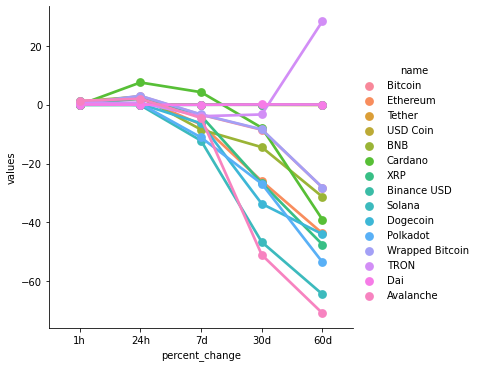

In [56]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df_frame_2, kind = 'point')

In [61]:
df10 = df[['name', 'quote.USD.price', 'Timestamp']]
df11 = df10.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,Timestamp
0,Bitcoin,30533.15582,2022-06-08 08:28:08.427011
0,Bitcoin,30507.82856,2022-06-08 08:39:50.769210
0,Bitcoin,30503.62529,2022-06-08 08:40:52.018025
0,Bitcoin,30501.64455,2022-06-08 08:41:53.363120


<AxesSubplot:xlabel='Timestamp', ylabel='quote.USD.price'>

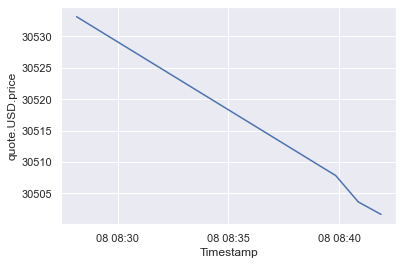

In [63]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'Timestamp', y = 'quote.USD.price', data = df11)